In [7]:
#Importing the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,RepeatedStratifiedKFold,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import roc_curve,auc




In [8]:
# Reading data into the dataframe

data = pd.read_csv('/content/sample_data/data-breastCancer.csv')

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
data.shape

(569, 33)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
## Data Cleaning 

# --> Veifying null values in the data
# --> checking the the cosmetic properties
# --> Handling the null values

In [13]:
#check for null values

data.isnull().values.any()

True

Here the columns names appear to have space in between the names. To avoid that we use the _ in the column name.

In [14]:
#list the columns , 

data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
data.columns = [c.replace(' ', '_') for c in data.columns]

data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed:_32'],
      dtype='object')

In [16]:
# deleting the null values columns

del data['Unnamed:_32']

In [17]:
data.set_index(['id'] , inplace=True)

In [18]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [19]:
# Diagnosis is the target column. so map M as 1's to it and B as 0's

data['diagnosis'] = data['diagnosis'].map({ 'M' : 1 , 'B' : 0})

In [20]:
data.isnull().values.any()

False

Now the data is clean and there are no null values

In [21]:
# Check the target column value count 

data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

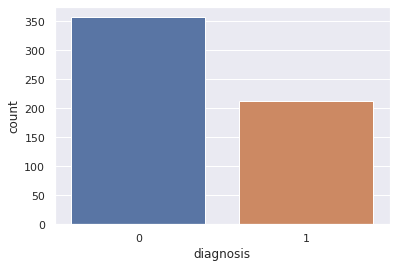

In [22]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot( x = 'diagnosis' , data = data )

Basically the dataset has a balance of both 0's and 1's observations. 

Next step is to develop the model as the data cleaning as done.

In [23]:
# Train and test datasets 
X = data.drop(labels='diagnosis', axis=1)
y = data['diagnosis']

In [24]:
# Using RandomstratifiedKFold 

strat_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [25]:
bag_agg = BaggingClassifier()

In [26]:
#Using n_jobs = -1 i.e., accomodating all processors 

perf = cross_val_score(bag_agg, X, y, scoring='roc_auc', cv=strat_fold, n_jobs=-1)

In [27]:
# Receiver operating characteristic

print(f'Mean ROC AUC: {np.mean(perf)}')

Mean ROC AUC: 0.984873164754117


In [28]:
# Using Gridsearch CV for hyper parameter tuning

classifier_rf = RandomForestClassifier(random_state=1)
np.random.seed(42)


param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(classifier_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Split data set into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


cv_rf.fit(X_train, y_train)

print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}


In [29]:
classifier_rf.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  max_depth = 4)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       random_state=1)

In [30]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       random_state=1)

In [31]:
# predicting the values 
y_predict = classifier_rf.predict(X_test)
print(y_predict)

[0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]


In [32]:
#Confusion matrix to visualize the accuracy

crosstab_test = pd.crosstab(index = y_test, columns = y_predict)
val_cross_tab = crosstab_test.values

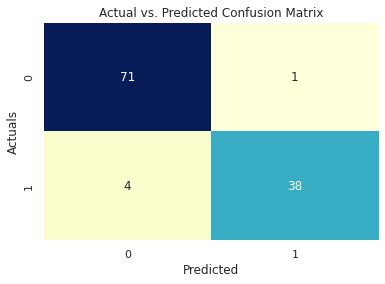

In [33]:
sns.heatmap(val_cross_tab, annot=True, fmt='d', cbar=False,cmap="YlGnBu")
plot.xlabel('Predicted')
plot.ylabel('Actuals')
plot.title('Actual vs. Predicted Confusion Matrix')
plot.show()

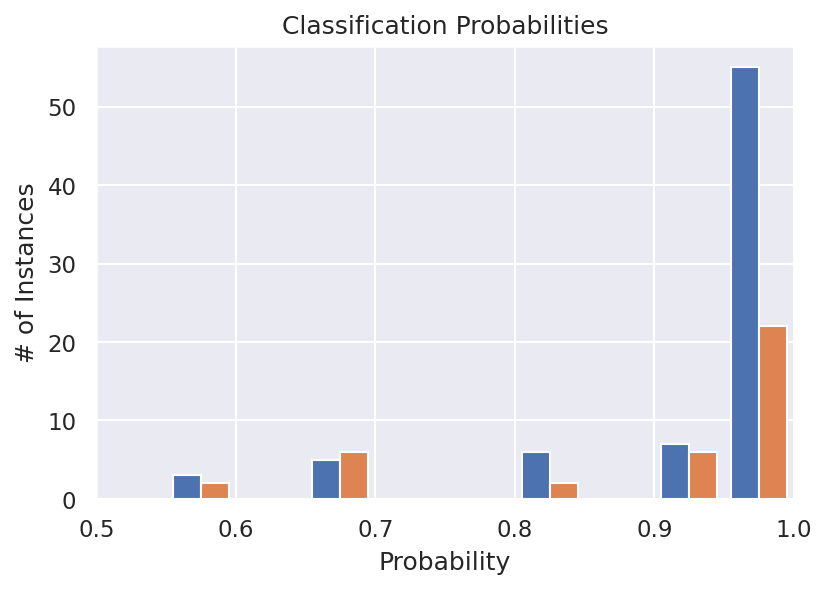

In [34]:
# Finding the probability distribution using the model
bag_agg.fit(X_train, y_train)

probas = bag_agg.predict_proba(X_test)

plot.figure(dpi=150)
plot.hist(probas, bins=20)
plot.title('Classification Probabilities')
plot.xlabel('Probability')
plot.ylabel('# of Instances')
plot.xlim([0.5, 1.0])
plot.show()

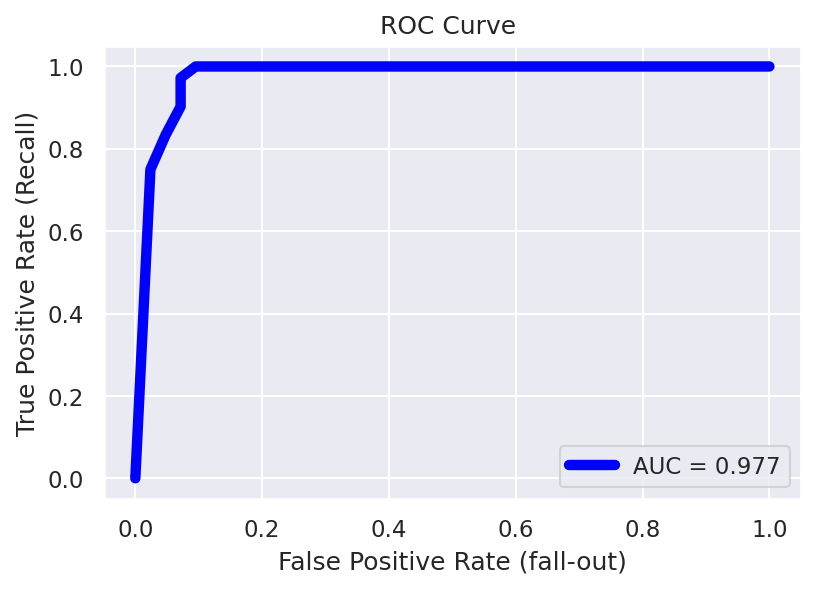

In [35]:

# To retreive the posive rates true or false
false_pr, true_pr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc_curve = auc(false_pr, true_pr)
# PLOT ROC curve
plot.figure(dpi=150)
plot.plot(false_pr, true_pr, lw=5, color='blue', label=f'AUC = {roc_auc_curve:.3f}')
plot.title('ROC Curve ')
plot.xlabel('False Positive Rate (fall-out)')
plot.ylabel('True Positive Rate (Recall)')
plot.xlim([-0.05, 1.05])
plot.ylim([-0.05, 1.05])
plot.legend()
plot.show()